# DASAR TEORI

## Gamma Correction

<p align="justify">Gamma (Power-Law Transformation), di simbolkan dengan huruf yunani γ, dijelaskan sebagai
hubungan antara masukan dan keluaran yang dihasilkan. Masukan yang dimaksud adalah nilai
intensitas RGB dari citra. Hubungan antara masukan dan keluaran yang dimaksud adalah
keluarannya proporsional dengan masukan yang dipangkatkan dengan nilai Gamma.

## Bit Depth

<p align="justify">Operasi ini digunakan untuk menunjukkan pada anda tentang kuantisasi citra. Kuantisasi yang
dilakukan adalah pada nilai kedalaman warna 1 – 7bit. Transformasi ini sifatnya adalah simulasi
saja, bit tidak benar benar berjumlah 1-7bit, hanya variasi warnanya saja sejumlah 1-7bit.
Tentukan level kedalaman terlebih dahulu, kemudian nilai warna baru adalah hasil dari warna
lama yang dioperasikan dengan level yang telah ditentukan.

## PSNR

<p align="justify">PSNR (Peak Signal-to-Noise Ratio) adalah ratio antara nilai power maksimum dari citra dengan
power dari citra yang terkena noise yang mempengaruhi kualitas dari citra ternoise. Untuk
menghitung PSNR dari citra, yang perlu dilakukan adalah membandingkan image hasil
denoising / terkompress dengan citra ideal yang memiliki power maksimum (dalam hal ini
adalah citra asli).

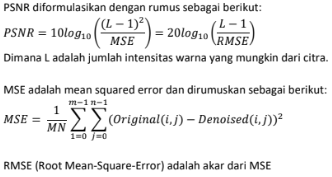

In [1]:
import cv2
import numpy as np

img1 = cv2.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/lena.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/lena_gs_lc.jpg')

squared_diff = np.square(img1 - img2)

# Menghitung mean squared error (MSE)
mse = np.mean(squared_diff)

# Menghitung nilai maksimum yang mungkin dari piksel
max_pixel_value = 255.0

# Menghitung PSNR
psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

# Cetak nilai PSNR
print(f"PSNR: {psnr} dB")

PSNR: 27.718008130678953 dB


## Average Denoising

<p align="justify">Average Denoising merupakan operasi aritmatika yang dikenakan pada citra untuk berbagai
keperluan yang bermanfaat. Pada modul kali ini akan ditunjukkan operasi Averaging untuk
denoising / mengurangi noise pada image. Operasi ini melakukan perhitungan nilai rata-rata tiap
pixel yang berkoordinat sama dalam sebuah kumpulan citra. Operasi ini biasanya dilakukan untuk
menghilangkan noise dari factor eksternal yang terjadi saat akuisisi citra. Average denoising biasa
digunakan pada citra yang memiliki noise eksternal yang muncul akibat proses distribusi dari
sumber ke tujuan. <br>

<p align="justify">Average image bekerja dengan menghitung nilai rata2 tiap pixel sesuai jumlah citra yang dirata-
rata. Semakin banyak jumlah citra yang dirata2, maka akan semakin baik hasil denoised nya,semakin tinggi nilai PSNRnya. Perhatikan bahwa makin tinggi nilai PSNR, makin baik kualitas citra
hasil denoise-nya.

## Image Masking

<p align="justify">Image masking adalah contoh dari operasi Logika yang digunakan untuk mengolah citra. Buka
kembali buku Gonzales section 2.6.4 untuk pembahasan lebih detail tentang operasi logika.
Beberapa operator logika yang sering digunakan pada pengolahan citra adalah operator OR,
AND, dan NOT. Pada Image Masking, operator yang biasa digunakan adalah operator AND.
Jika diasumsikan dua region (sets) A dan B terdiri dari pixel foreground, maka operasi OR dari dua set ini adalah dapat berisi nilai dari A atau B. Gambar berikut mengilustrasikan operasi- operasi Logika pada citra.

# Tugas Modul 5

## 1. Buat Gamma Correction sesuai dengan petunjuk berikut

<p align="justify">Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


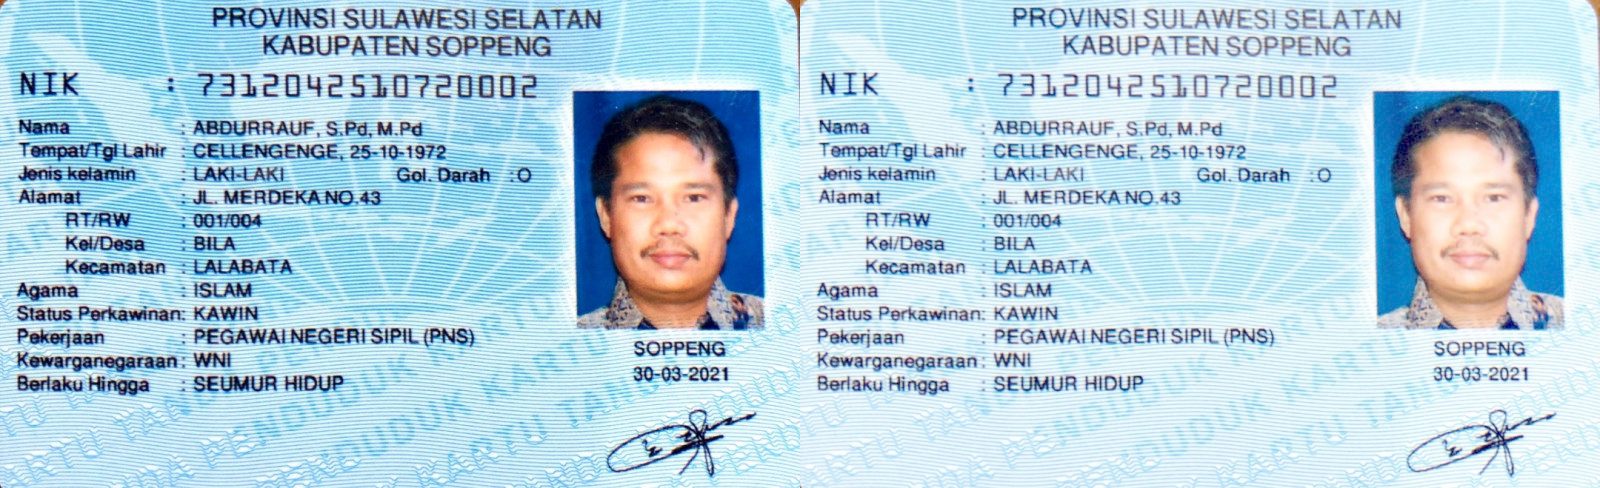

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
#import math
from math import log10, sqrt, pow
import os
import glob

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## 2. Buat Simulasi Image Depth

<p align="justify">Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst. <br> <br>

<p align="justify">Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

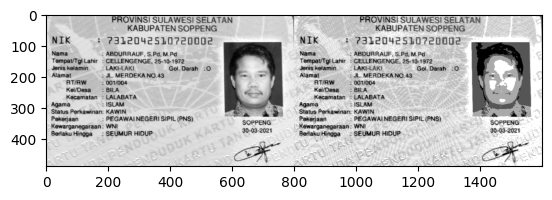

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

## 3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya. <br>
Citra asli sudah disediakan pada /images/galaxy.jpg.<br>
<p align="justify">100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob). <br>

nilai psnr-nya adalah:  4.960234759922583  dB


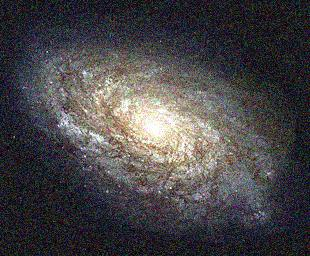

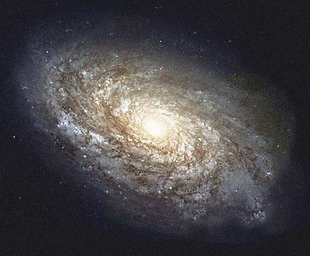

In [ ]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 5 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 20
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

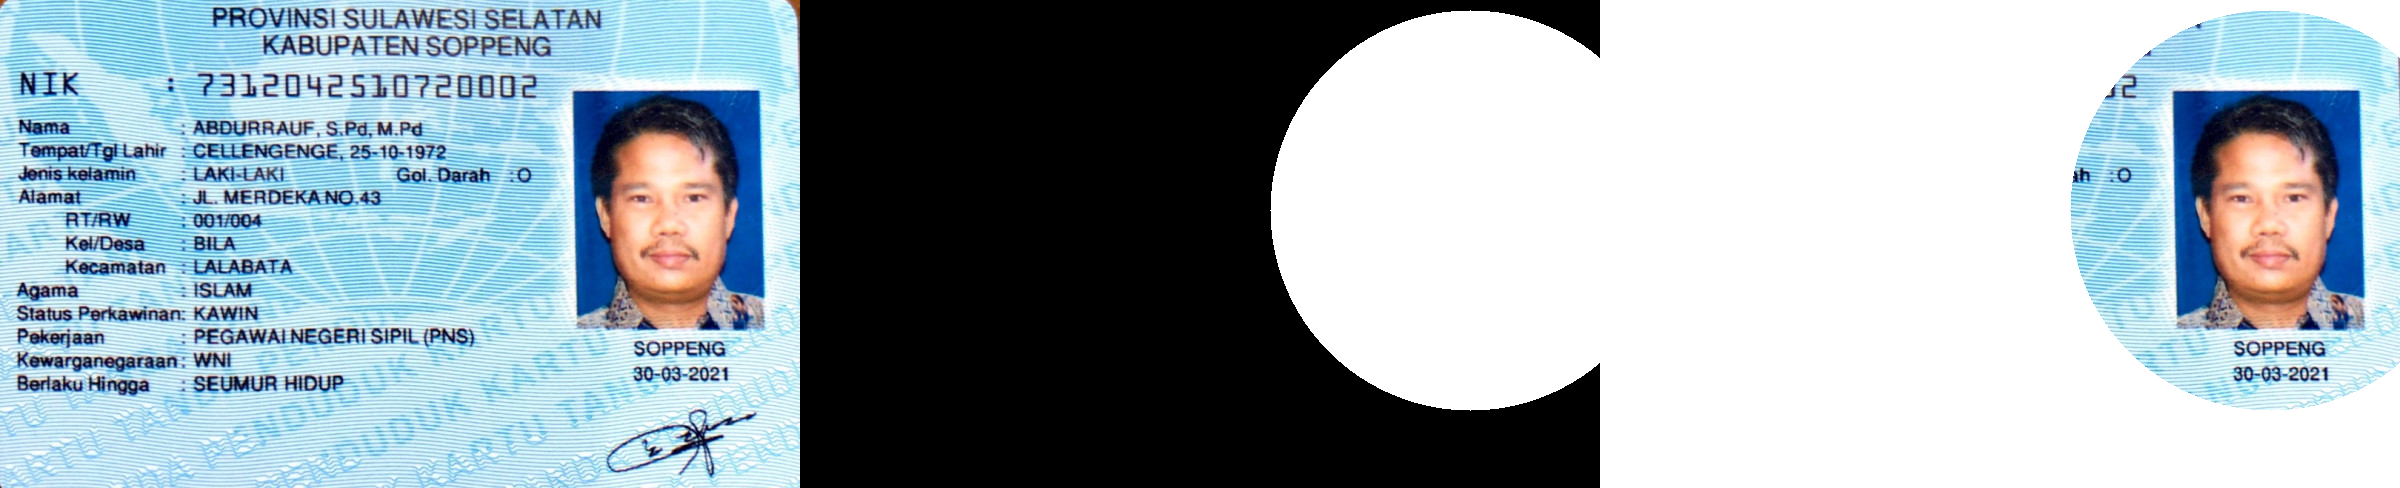

In [14]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 210), 200, (255,255,255), -1)

result = img & mask
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

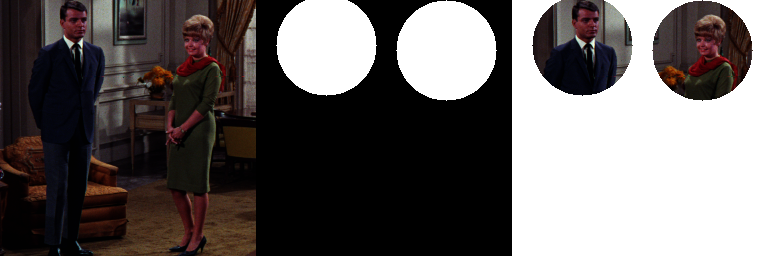

In [17]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 45), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

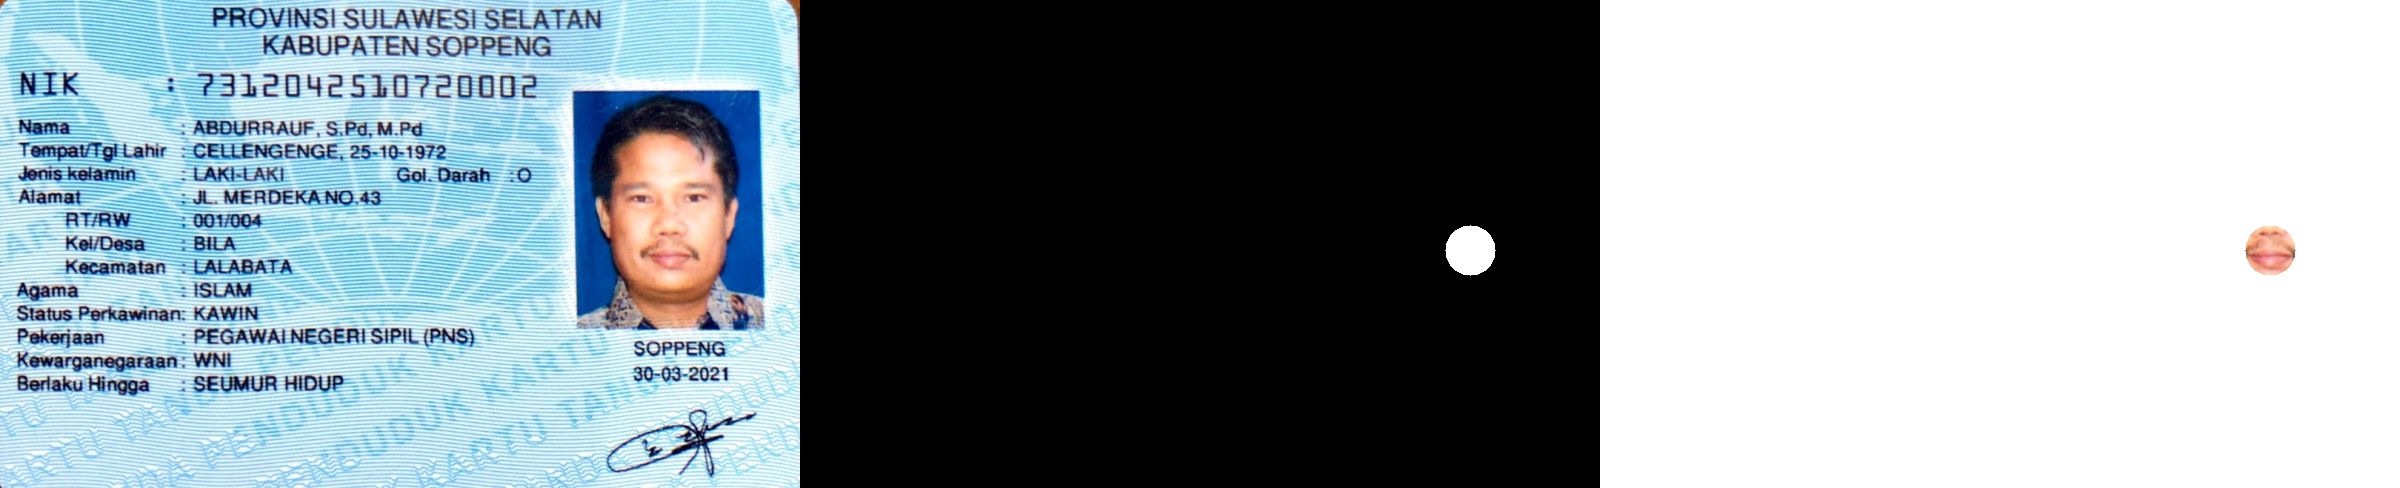

In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
#import math
from math import log10, sqrt, pow
import os
import glob

#img = cv.imread('/content/drive/MyDrive/images/mandrill.tiff')
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')
# img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(img_color)

# Face
# mask = np.zeros(img.shape, dtype=np.uint8)
# mask = cv.circle(mask, (670, 200), 100, (255,255,255), -1)

# nose
 # mask = np.zeros(img.shape, dtype=np.uint8)
 # mask = cv.circle(mask, (670, 220), 25, (255,255,255), -1)

# mount
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 250), 25, (255,255,255), -1)

# plt.imshow(mask)

result = img & mask
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(img, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

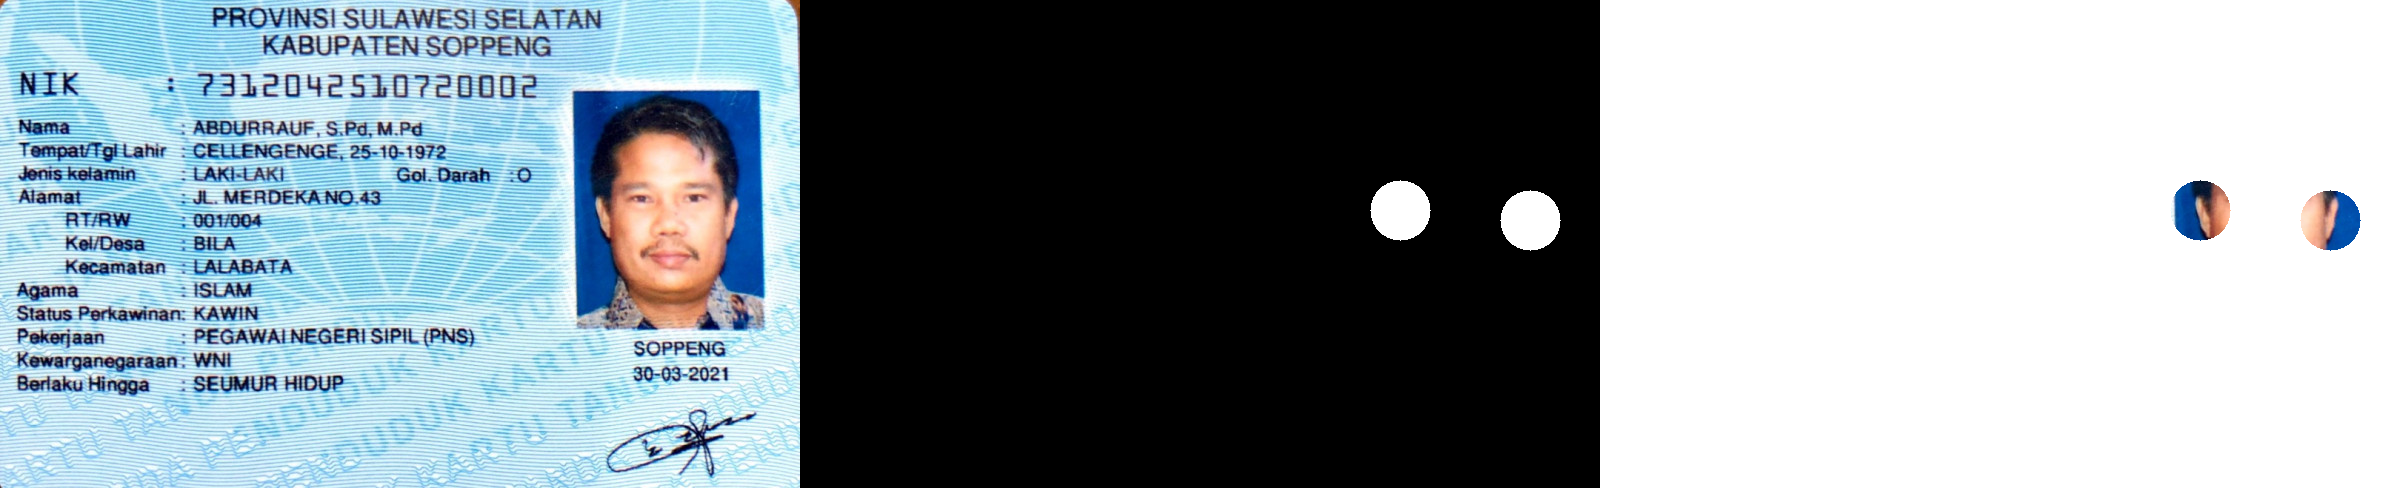

In [21]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')
# Eye
# mask = np.zeros(img.shape, dtype=np.uint8)
# mask = cv.circle(mask, (700, 200), 20, (255,255,255), -1)

# mask2 = np.zeros(img.shape, dtype=np.uint8)
# mask2 = cv.circle(mask, (650, 200), 20, (255,255,255), -1)

# Ear
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (730, 220), 30, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)